# Data Preparation

C:\Users\shres\AppData\Local\Temp\ipykernel_21044\958879838.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


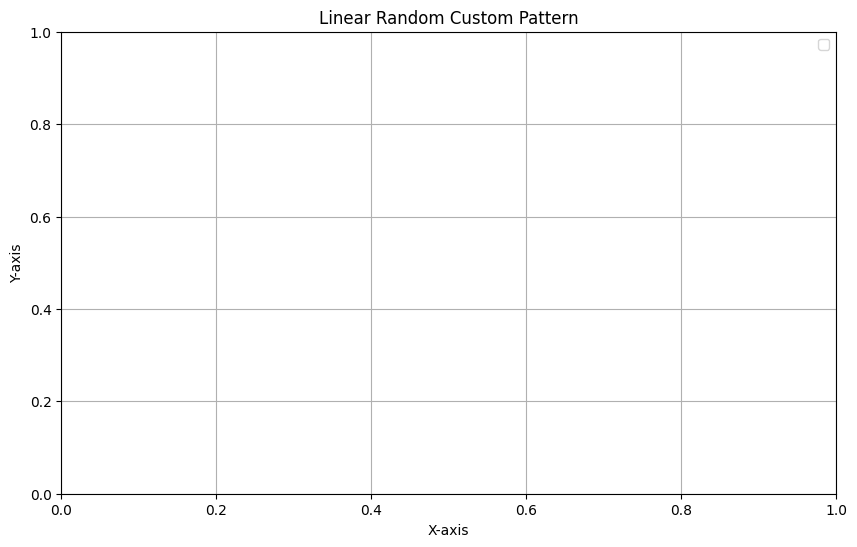

In [5]:
import matplotlib.pyplot as plt
import numpy as np

mainX = []
mainY = []

for i in range(20):
    # Generate random data
    x = np.linspace(20, 20, 20)
    y = np.random.rand(20) + x * np.random.rand(20)  # Linear pattern with noise
    
    mainX.extend(x)
    mainY.extend(y)


# Create a line plot
plt.figure(figsize=(10, 6))
#plt.plot(mainX, y, color='blue', marker='o', linestyle='-', linewidth=2, markersize=6, label='Random Linear Pattern')

# Customize plot elements
plt.title('Linear Random Custom Pattern')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


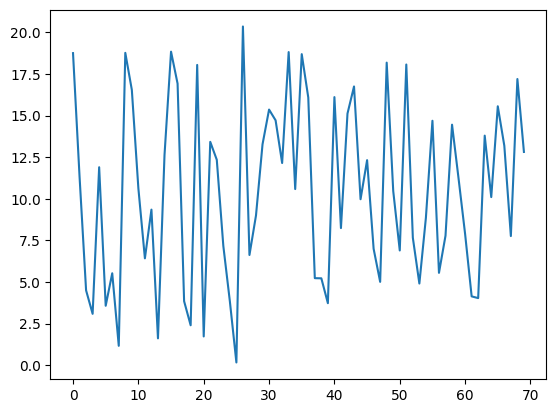

In [6]:
plt.plot(mainY[:70])

In [7]:
len(mainY)

400

---

# Data Seperation

In [8]:
XData = mainY[:393]
YData = mainY[7:]

In [9]:
len(XData), len(YData)

(393, 393)

In [11]:
def split(list_a, chunk_size):
    for i in range(0, len(list_a)-1, chunk_size):
        yield np.array(list_a[i:i + chunk_size]).astype(np.float32)

chunk_size = 7
XData = (list(split(XData, chunk_size)))
YData = (list(split(YData, chunk_size)))

In [12]:
len(XData),len(YData)

(8, 8)

In [13]:
YData.pop()
XData.pop()

array([[10.699506 ,  0.7211834, 18.141695 , 16.84814  ,  7.1632223,
        18.636122 , 19.930473 ],
       [ 4.3639708, 10.279118 ,  6.5284543,  5.156432 ,  6.6897492,
         5.871793 ,  4.182823 ],
       [15.778149 ,  2.9043841, 18.116228 , 13.588387 ,  3.200435 ,
        19.805939 , 18.164465 ],
       [13.02313  ,  3.0396695,  3.6517348,  4.0118513,  7.820222 ,
        18.69271  , 19.382269 ],
       [16.568907 , 19.412027 , 15.919923 ,  5.957416 ,  1.9437679,
         3.2703502,  8.407282 ],
       [16.086056 , 16.125772 ,  9.782218 , 14.576757 ,  7.1604204,
        10.65511  , 11.901649 ],
       [17.578545 , 10.772193 , 17.975552 ,  8.990523 , 13.291618 ,
        16.188982 ,  9.26559  ]], dtype=float32)

In [14]:
YData = np.asarray(YData).astype(np.float32)
XData = np.asarray(XData).astype(np.float32)

## Model Building and Training
---

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.layers import LSTM

from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler,ReduceLROnPlateau

from sklearn.model_selection import KFold,GroupKFold
from tensorflow.keras import layers
tf.config.run_functions_eagerly(True) 

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 XData, YData, test_size=0.33, random_state=42)

In [52]:
YData

array([[[ 1.1592311 , 18.766691  , 16.541136  , 10.628691  ,
          6.41687   ,  9.344761  ,  1.6077468 ],
        [12.621263  , 18.837475  , 16.918278  ,  3.8405209 ,
          2.3951697 , 18.040602  ,  1.7225139 ],
        [13.418154  , 12.339662  ,  7.164841  ,  3.8374093 ,
          0.15811181, 20.351612  ,  6.6179743 ],
        [ 8.995107  , 13.2708    , 15.357509  , 14.710334  ,
         12.145681  , 18.813272  , 10.580713  ],
        [18.68886   , 16.081638  ,  5.225467  ,  5.2159634 ,
          3.7219183 , 16.107147  ,  8.235137  ],
        [15.117374  , 16.745878  ,  9.969362  , 12.317047  ,
          6.991159  ,  5.0036407 , 18.178682  ],
        [10.464075  ,  6.889996  , 18.065514  ,  7.6571226 ,
          4.9025335 ,  8.857065  , 14.684979  ]],

       [[ 5.5449357 ,  7.7779675 , 14.449688  , 11.20642   ,
          7.8769364 ,  4.1306376 ,  4.026769  ],
        [13.791437  , 10.097843  , 15.5553875 , 13.182593  ,
          7.755576  , 17.19391   , 12.81155   ],
        

In [71]:
def build_model():
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True), input_shape=(7, 1)))

    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)))
    
    model.add(tf.keras.layers.GRU(64, return_sequences=True, kernel_initializer='uniform'))
    model.add(tf.keras.layers.Dropout(0.2))
    
    model.add(tf.keras.layers.GRU(32, return_sequences=True, kernel_initializer='uniform'))
    model.add(tf.keras.layers.Dropout(0.2))


    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(7))
    
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mae', metrics=['mse'])

    model.summary()
    
    return model

In [72]:
save_best = tf.keras.callbacks.ModelCheckpoint("Model.keras", monitor='val_loss',verbose=1, save_best_only=True)

In [73]:
model = build_model()
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=40, batch_size=128, verbose=1, callbacks=[save_best])

c:\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


ValueError: object __array__ method not producing an array

---

In [27]:
test = np.array([18.31,16.44,18.23,15.65,17.67,16.75,19.34]).astype(np.float32)
pred = model.predict(test.reshape(1,7))

graphPrediction = []
graphPrediction.extend(test)
graphPrediction.extend(pred.reshape(-1))

x = []
for i in range(14):
    x.append(i)

# Create a line plot with two colors
plt.figure(figsize=(10, 6))

# Plot the first segment of the line in blue
plt.plot(x[:7], graphPrediction[:7], color='blue', linestyle='-', linewidth=2, label='Input')

# Plot the second segment of the line in red
plt.plot(x[7:], graphPrediction[7:], color='red', linestyle='--', linewidth=2, label='AI Predicted')

# Customize plot elements
plt.title('Line Plot with Two Colors')
plt.xlabel('Days')
plt.ylabel('Carbon Emit')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


NameError: name 'model' is not defined

1/1 [==============================] - 0s 31ms/step


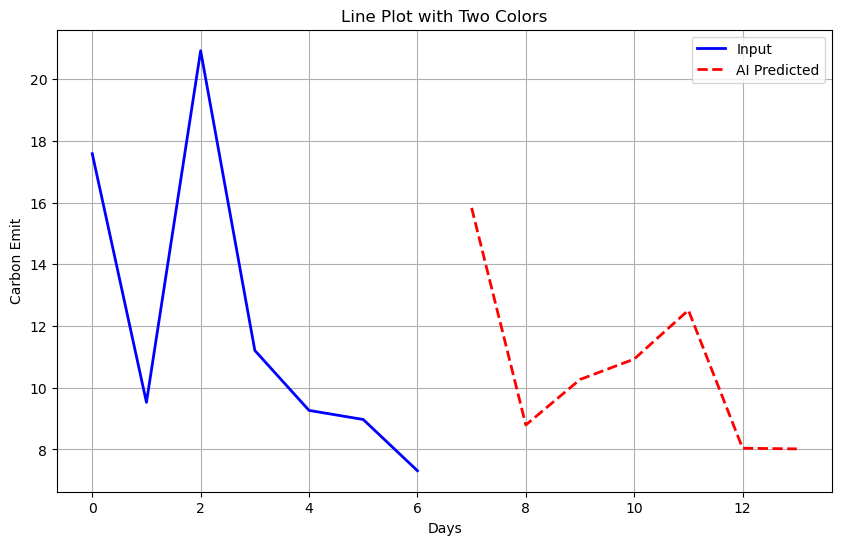

In [55]:
test = np.array([17.582363,  9.527162, 20.918768, 11.207062,  9.265643, 8.97169 ,
        7.311791]).astype(np.float32)
pred = model.predict(test.reshape(1,7))

graphPrediction = []
graphPrediction.extend(test)
graphPrediction.extend(pred.reshape(-1))

x = []
for i in range(14):
    x.append(i)

# Create a line plot with two colors
plt.figure(figsize=(10, 6))

# Plot the first segment of the line in blue
plt.plot(x[:7], graphPrediction[:7], color='blue', linestyle='-', linewidth=2, label='Input')

# Plot the second segment of the line in red
plt.plot(x[7:], graphPrediction[7:], color='red', linestyle='--', linewidth=2, label='AI Predicted')

# Customize plot elements
plt.title('Line Plot with Two Colors')
plt.xlabel('Days')
plt.ylabel('Carbon Emit')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


---

# Month Prediction Algorithm

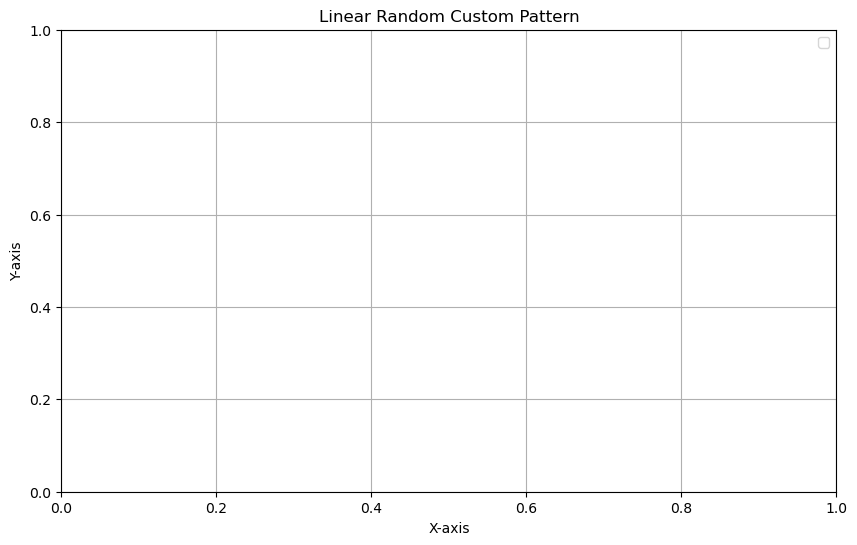

In [16]:
import matplotlib.pyplot as plt
import numpy as np

mainX = []
mainY = []

for i in range(100):
    # Generate random data
    x = np.linspace(20, 50, 50)
    y = np.random.rand(50) + x * np.random.rand(50)  # Linear pattern with noise
    
    mainX.extend(x)
    mainY.extend(y)


# Create a line plot
plt.figure(figsize=(10, 6))
#plt.plot(mainX, y, color='blue', marker='o', linestyle='-', linewidth=2, markersize=6, label='Random Linear Pattern')

# Customize plot elements
plt.title('Linear Random Custom Pattern')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


In [17]:
len(mainY)

5000

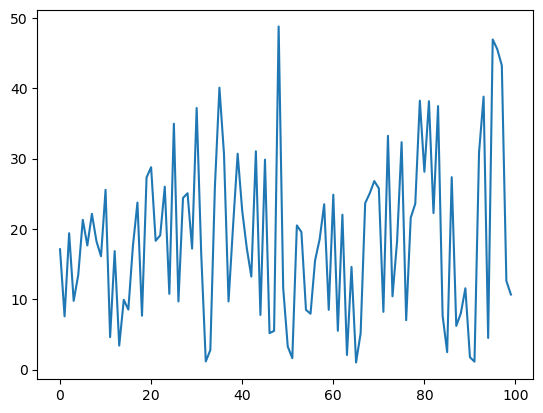

In [18]:
plt.plot(mainY[:100])

In [19]:
XData = mainY[:4970]
YData = mainY[30:]

In [20]:
len(XData), len(YData)

(4970, 4970)

In [21]:
def split(list_a, chunk_size):
    for i in range(0, len(list_a)-1, chunk_size):
        yield np.array(list_a[i:i + chunk_size]).astype(np.float32)

chunk_size = 30
XData = (list(split(XData, chunk_size)))
YData = (list(split(YData, chunk_size)))

In [22]:
YData.pop()
XData.pop()

array([15.3858595,  1.5091884, 16.767895 , 20.970259 , 12.405516 ,
        6.8139687,  4.3462043, 14.982436 ,  2.8390741,  2.283202 ,
       18.438557 ,  4.4184456, 11.576375 , 25.695673 ,  3.1050618,
       26.292295 , 19.34327  , 30.46266  ,  6.984598 ,  5.77318  ],
      dtype=float32)

In [23]:
YData = np.asarray(YData).astype(np.float32)
XData = np.asarray(XData).astype(np.float32)

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.layers import LSTM

from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler,ReduceLROnPlateau

from sklearn.model_selection import KFold,GroupKFold
from tensorflow.keras import layers

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 XData, YData, test_size=0.33, random_state=42)

In [26]:
def build_model():
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True), input_shape=(30, 1)))

    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='uniform'))
    model.add(tf.keras.layers.Dense(30))
    
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mae', metrics=['mse'])

    model.summary()
    
    return model

In [27]:
save_best = tf.keras.callbacks.ModelCheckpoint("monthModel.h5", monitor='val_loss',verbose=1, save_best_only=True)

In [2]:
model = build_model()
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1, callbacks=[save_best])

NameError: name 'build_model' is not defined

---

1/1 [==============================] - 1s 1s/step


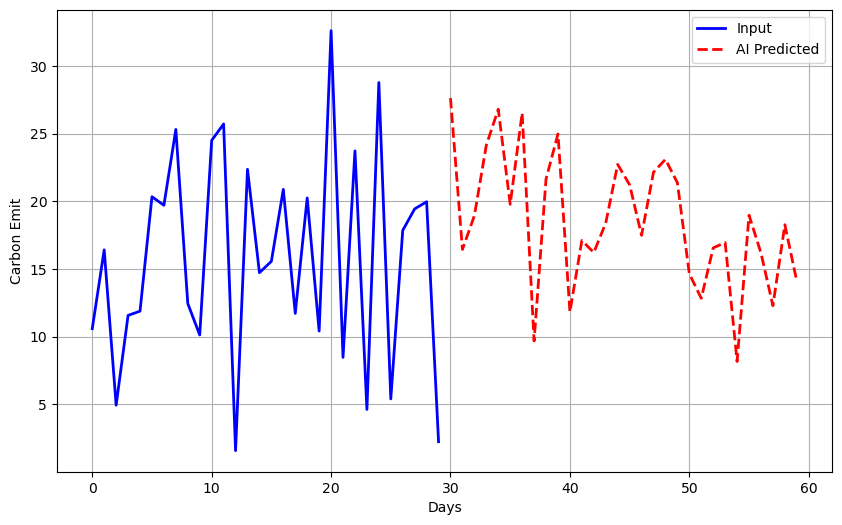

In [29]:
test = np.array([10.580897 , 16.407118 ,  4.9232693, 11.562812 , 11.876699 ,
       20.3376   , 19.706802 , 25.314161 , 12.438278 , 10.116097 ,
       24.502548 , 25.714218 ,  1.5572892, 22.36543  , 14.721957 ,
       15.5617   , 20.881203 , 11.710397 , 20.246723 , 10.40407  ,
       32.610992 ,  8.457507 , 23.724775 ,  4.6104083, 28.781645 ,
        5.388179 , 17.848938 , 19.437452 , 19.965925 ,  2.2242668]).astype(np.float32)

pred = model.predict(test.reshape(1,30))

graphPrediction = []
graphPrediction.extend(test)
graphPrediction.extend(pred.reshape(-1))

x = []
for i in range(60):
    x.append(i)

# Create a line plot with two colors
plt.figure(figsize=(10, 6))

# Plot the first segment of the line in blue
plt.plot(x[:30], graphPrediction[:30], color='blue', linestyle='-', linewidth=2, label='Input')

# Plot the second segment of the line in red
plt.plot(x[30:], graphPrediction[30:], color='red', linestyle='--', linewidth=2, label='AI Predicted')

# Customize plot elements
plt.xlabel('Days')
plt.ylabel('Carbon Emit')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


1/1 [==============================] - 0s 21ms/step


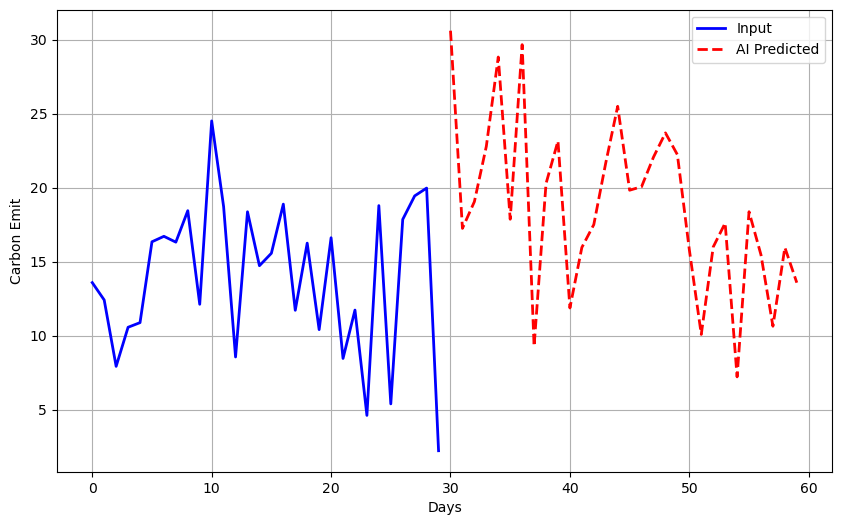

In [30]:
test = np.array([13.580897 , 12.407118 ,  7.9232693, 10.562812 , 10.876699 ,
       16.3376   , 16.706802 , 16.314161 , 18.438278 , 12.116097 ,
       24.502548 , 18.714218 ,  8.5572892, 18.36543  , 14.721957 ,
       15.5617   , 18.881203 , 11.710397 , 16.246723 , 10.40407  ,
       16.610992 ,  8.457507 , 11.724775 ,  4.6104083, 18.781645 ,
        5.388179 , 17.848938 , 19.437452 , 19.965925 ,  2.2242668]).astype(np.float32)

pred = model.predict(test.reshape(1,30))

graphPrediction = []
graphPrediction.extend(test)
graphPrediction.extend(pred.reshape(-1))

x = []
for i in range(60):
    x.append(i)

# Create a line plot with two colors
plt.figure(figsize=(10, 6))

# Plot the first segment of the line in blue
plt.plot(x[:30], graphPrediction[:30], color='blue', linestyle='-', linewidth=2, label='Input')

# Plot the second segment of the line in red
plt.plot(x[30:], graphPrediction[30:], color='red', linestyle='--', linewidth=2, label='AI Predicted')

# Customize plot elements
plt.xlabel('Days')
plt.ylabel('Carbon Emit')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


In [1]:
model.save('model.keras')

NameError: name 'model' is not defined

---